<a href="https://colab.research.google.com/github/nayonsoso/Pytorch/blob/main/titanic_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-titanic/input/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-titanic/input/test.csv')

# EDA(Exploratory data analysis)

In [3]:
# 상위 5개의 row 조회
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary
- Survived: 0 = 사망, 1 = 생존
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: (siblings + spouses) 형제나 배우자
- parch: (parents + children) 부모나 자식
- ticket: Ticket number
- fare: 요금
- cabin: 객실 번호
- embarked: 선착장 정보 C = Cherbourg, Q = Queenstown, S = Southampton

위 column으로 Survived를 예측하는 것이 목표이다.

## Data Formation

In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

train 세트에는 891명의 승객 정보가 있고, 12개의 column이 있다.

test 세트에는 418명의 승객 정보가 있고, 11개의 column이 있다.

test 세트에서 빠진 column : Survived (예측해야 하므로)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


age와 cabin의 정보가 부족함을 알 수 있다. (NaN)

NaN 데이터는 전처리가 필요하다. (평균값을 사용하거나 삭제하는 방법이 있음)

위의 방법처럼 info()를 보지 않더라도 pandas에서는 null데이터를 찾는 함수 `isnull()` 를 제공한다.

`isnull().sum()`으로 null데이터의 수를 파악할 수 있다.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Visualization

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

cf. matplotlib 과 seaborn 차이점

- matplotlib은 기본적인 차트를 그릴 수 있는 라이브러리
- seaborn은 matplotlib을 기반으로 만들어졌으며, 통계 데이터 시각화에 최적화된 라이브러리

### Bar Chart for Categorical Features

**Sex, Pclass, SibSp, Parch, Embarked, Cabin**을 기준으로 생존, 사망의 bar chart를 그려보자.

In [11]:
# 변수로 집어넣은 feature에 대해 bar chart를 그리는 함수
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

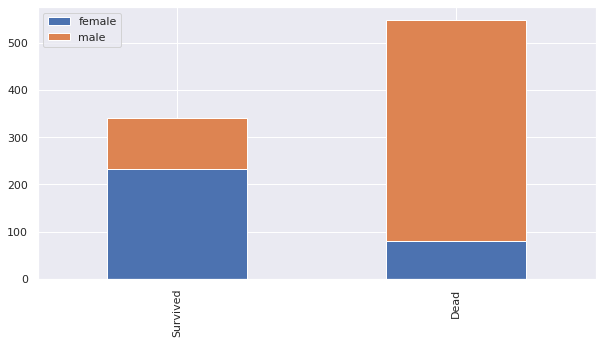

In [12]:
bar_chart('Sex')

여성이 남성보다 많이 살아남음

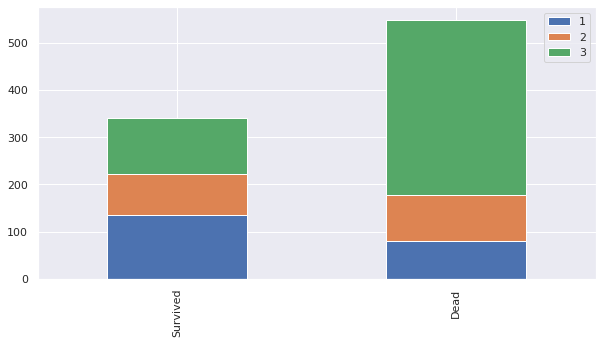

In [13]:
bar_chart('Pclass')

1등석이 다른 좌석보다 많이 살아남았으며, 3등석이 가장 많이 사망하였음

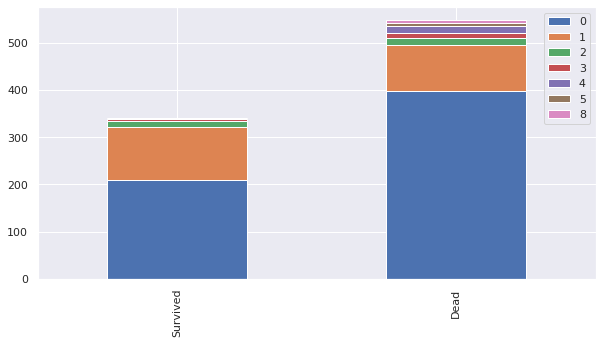

In [14]:
bar_chart('SibSp')

형제나 배우자와 동승하지 않았을 경우, 상대적으로 더 많이 사망함

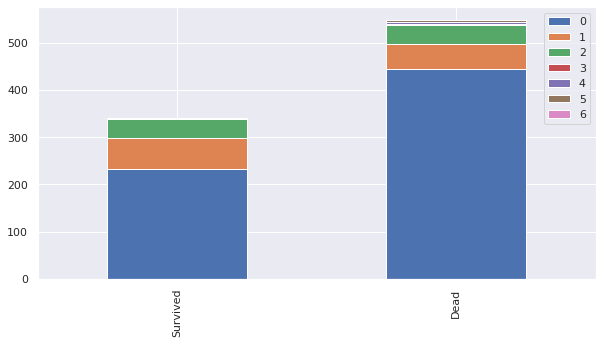

In [15]:
bar_chart('Parch')

부모나 자식과 동승하지 않았을 경우, 상대적으로 더 많이 사망함

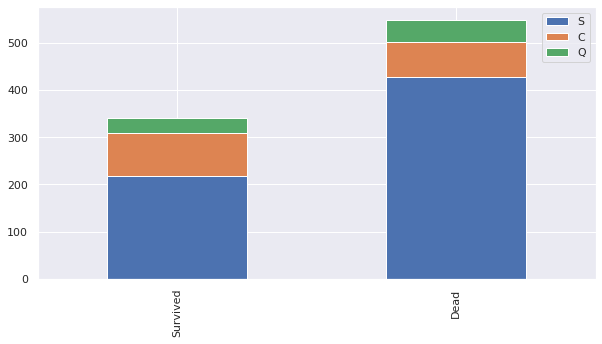

In [16]:
bar_chart('Embarked')

S 선착장에서 탄 경우, 사망할 확률이 더 높음

C 선착장에서 탄 경우, 생존할 확률이 더 높음

Q 선착장에서 탄 경우, 사망할 확률이 더 높음 

# Feature engineering

(여기서 feature은 data의 column처럼 데이터를 특징짓는 것을 의미함)

Feature engineering은 데이터에 대한 도메인 지식을 바탕으로 feature을 기계가 학습하기 쉽게 바꾸는 작업을 말한다.

ex. 시간에 대해 학습할 때, `오후 2시` 를 `14:00`로 바꿀 수 있음

본 실습에서 feature engineering은 아래의 과정으로 진행된다.

**1. feature를 numerical vector로 나타내기**

- Name에서 유의미한 정보인 Mr, Miss, Mrs를 추출하여 숫자로 매핑

- Sex에서 'male', 'female'을 각각 0, 1 로 매핑

- Age의 이산형 변수가 유의미하도록 범주형 변수로 binning 

**2. null data를 보정**

- Age의 NaN 데이터를 Title의 평균 나이로 보정

## Name mapping

유의미한 정보인 Mr, Miss, Mrs를 추출하여 숫자로 매핑

### 1. 뒤에 .이 붙는 단어 즉, 호칭을 추출한다.

In [17]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [19]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

### 2. integer 형식으로 mapping 한다.

In [20]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [21]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

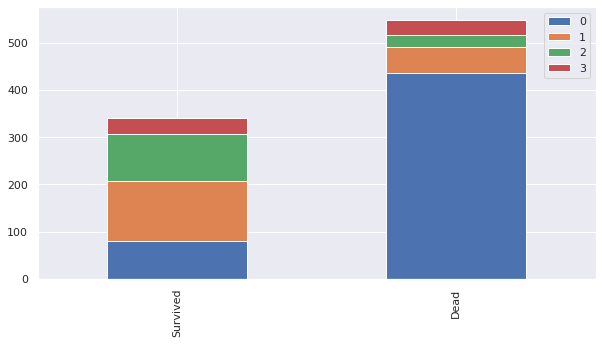

In [22]:
bar_chart('Title')

0에 해당하는 남성이 많이 죽고, 1,2 에 댕하는 여성이 많이 살아남았음을 볼 수 있다.

### 3. 의미가 없는 Name 피쳐를 drop한다.

In [23]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

## Sex mapping

'male', 'female'을 각각 0, 1 로 매핑

In [24]:
sex_mapping = {"male":0, "female":1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

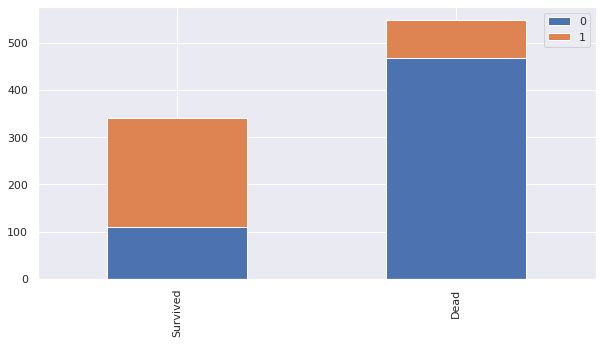

In [25]:
bar_chart('Sex')

## Age

결측값인 NaN 데이터를 Title의 중간값(median)로 보정

중간값으로 보정할지 평균으로 보정할지는 case by case.

`df.fillna()`를 사용하면 괄호 안의 값으로 결측값이 보정됨

`groupby()`는 같은 값을 갖는 데이터끼리 묶어 그룹으로 처리할 수 있게 해줌

ex. train.groupby("Title")["Age"].transform("median") : 0,1,2,3 끼리 묶어 중간값을 넣어라

In [26]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0


In [27]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

groupby, transform 보충 설명 : https://url.kr/th9pu5

In [28]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


### Binning

이산형 변수(연속적인)를 범주형 변수로 변환하는 기법

ex. 전체 나이를 [유아, 청소년, 청년, 장년] 으로 나눌 수 있음

numpy에서 제공하는 digitize 함수 사용 : https://jfun.tistory.com/61

In [29]:
import numpy as np
for dataset in train_test_data:
    dataset['Age'] = np.digitize(dataset['Age'], bins= [17,27,37,63])

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0


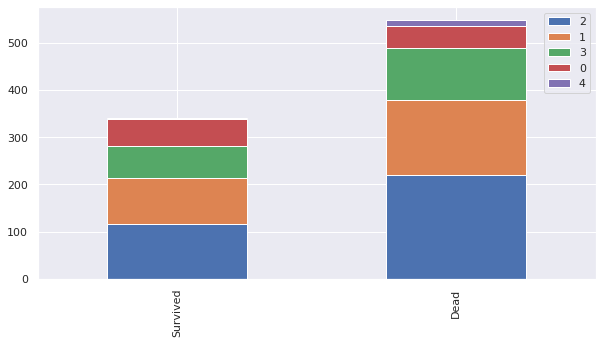

In [31]:
bar_chart('Age')

생존 : 사망의 비율에도 불구하고, 0에 해당하는 아이들은 조금 더 생존했음을 볼 수 있다.

## Embarked (탑승한 선착장)

선착장에 따라 어떤 좌석에 앉았는지 연관있을 수 있으므로 값을 보정할 필요가 있음

### 결측값 보정

In [32]:
# 두개의 결측값 존재
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [33]:
# 1등석의 Embarked count
train[train['Pclass']==1]['Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [34]:
# 2등석의 Embarked count
train[train['Pclass']==2]['Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [35]:
# 2등석의 Embarked count
train[train['Pclass']==3]['Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

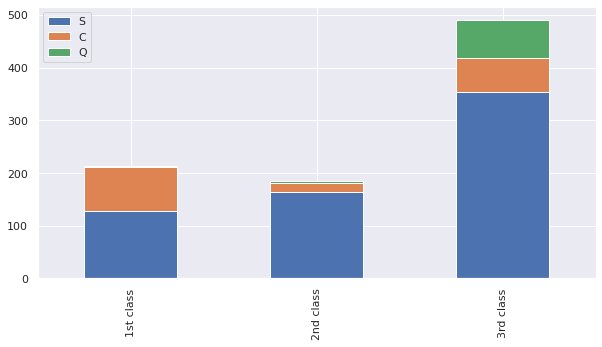

In [36]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

세 클래스 모두 S 선착장이 50%를 넘게 차지하고있으므로 NaN에 S를 넣어 보정해보자.

In [37]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### mapping

In [39]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare

### 결측값 보정

결측값에 각 좌석의 **요금 중간값**을 대입 

In [40]:
# test 데이터셋에 결측값 존재
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [41]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [42]:
# Fare 결측값 사라짐
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

### Binnig

요금을 분석하기 쉽게 구간별로 binning

In [43]:
for dataset in train_test_data:
    dataset['Fare'] = np.digitize(dataset['Fare'], bins= [18,31,101])

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,2,C85,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1,1,1,2,1,0,113803,2,C123,0,2
4,5,0,3,0,2,0,0,373450,0,NaN,0,0


## Cabin (객실 번호)

맨 앞의 알파벳이 좌석과 연관있다는 가설을 세울 수 있다.

In [45]:
# 맨 앞의 알파벳만 고려
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

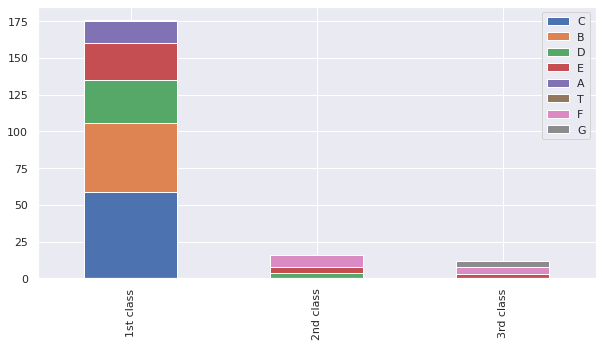

In [46]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

일등석에는 A, B, C, D, E 가 있지만, 나머지 좌석에는 거의 없다.

따라서 앞에 세운 '객실 번호는 좌석과 관련이 있다'는 가설을 증명할 수 있다.

### Mapping

In [47]:
# feature scaling
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

### 결측값 보정

좌석의 Cabing 중간값으로 결측값을 보정한다.

In [48]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## FamilySize

SibSp(형제나 베우자) 와 Parch(부모나 자식)을 묶어 FamilySize라는 피쳐를 만들자.

In [49]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [50]:
# feature scaling
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

## 필요없는 피쳐 제거

- 의미 없는 데이터인 Ticket 하나로 묶은 SibSp와 Parch를 모두 제거한다.
- train 에서 Survived 컬럼을 타겟으로 분리한다.
- train 에서는 의미없는 데이터인 PassengerId를 train에서만 제거한다.

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,1,0,A/5 21171,0,2.0,0,0,0.4
1,2,1,1,1,3,1,0,PC 17599,2,0.8,1,2,0.4
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,2.0,0,1,0.0
3,4,1,1,1,2,1,0,113803,2,0.8,0,2,0.4
4,5,0,3,0,2,0,0,373450,0,2.0,0,0,0.0


In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2,0,0,330911,0,2.0,2,0,0.0
1,893,3,1,3,1,0,363272,0,2.0,0,2,0.4
2,894,2,0,3,0,0,240276,0,2.0,2,0,0.0
3,895,3,0,2,0,0,315154,0,2.0,0,0,0.0
4,896,3,1,1,1,1,3101298,0,2.0,0,2,0.8


In [53]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId'], axis=1)

train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [54]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,0,2.0,0,0,0.4
1,1,1,1,3,2,0.8,1,2,0.4
2,1,3,1,1,0,2.0,0,1,0.0
3,1,1,1,2,2,0.8,0,2,0.4
4,0,3,0,2,0,2.0,0,0,0.0


In [55]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2,0,2.0,2,0,0.0
1,893,3,1,3,0,2.0,0,2,0.4
2,894,2,0,3,0,2.0,2,0,0.0
3,895,3,0,2,0,2.0,0,0,0.0
4,896,3,1,1,0,2.0,0,2,0.8


모든 필요한 피쳐가 다 숫자로 표현되었다.

# Modelling

- K 폴드로 교차검증
- KNN, DecisionTree, RandomForest, Nauve Bayes, GradientBoosting, XGB, LightGBM, CatBoosting 를 이용

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [57]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### KNN

- 교차 검증을 위해 **cross_validate** 라이브러리를 사용한다.
- 최종 validate score은 전체 점수를 평균한 값이다.

In [58]:
clf = KNeighborsClassifier(n_neighbors = 13) # 모델 생성
scoring = 'accuracy'
# cross_validate(모델 객체, 훈련 인풋, 훈련 타겟)
score1 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score1)*100, 2)

82.04

### Decision Tree

In [59]:
clf = DecisionTreeClassifier()
score2 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score2)*100, 2)

80.02

### RandomForest

In [60]:
clf = RandomForestClassifier(n_estimators=13)
score3 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score3)*100, 2)

81.59

### Naive Bayes

In [61]:
clf = GaussianNB()
score4 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score4)*100, 2)

78.56

### Gradient Boost

In [62]:
clf = GradientBoostingClassifier(n_estimators = 100)
score5 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score5)*100, 2)

83.16

### XGBoost

In [63]:
clf = XGBClassifier()
score6 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score6)*100, 2)

83.5

### Light GBM

설치 방법 참고 : https://url.kr/nkq8fo

In [64]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
score7 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score7)*100, 2)

82.94

### CatBoost

설치 방법 참고 : https://url.kr/1gwrtm 

In [65]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(silent=True)
score8 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score8)*100, 2)

82.83

# Testing

교차 검증에서 가장 점수가 높았던 모델 (XG Boost)로 제출 파일을 만들어 보자.

In [66]:
clf = XGBClassifier() # 모델 생성
clf.fit(train_data, target) # 모델 학습

test_data = test.drop("PassengerId", axis=1).copy() # PassengerId 없는 데이이터 얕은 복사
prediction = clf.predict(test_data)

캐글에서 요구한 형식에 맞게 예측값과 PassengerId로 Data frame을 만들고, csv 파일로 변환한다.

In [67]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-titanic/submission.csv', index=False)

In [68]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Reference

- https://url.kr/kzp7xt

=> 상위 80% 라는 처참한 결과가 나왔다..

### cf. 앙상블 학습




In [69]:
from sklearn.ensemble import VotingClassifier

# 개별 모델 생성
knn = KNeighborsClassifier(n_neighbors = 13)
rf = RandomForestClassifier(n_estimators=13)
cb = CatBoostClassifier(silent=True)

voting_model = VotingClassifier(
    estimators=[('knn',knn),('rf',rf),('cb',cb)],
    voting='soft'
)

score10 = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score10)*100, 2)

83.5

In [70]:
# 앙상블 모델 학습
voting_model.fit(train_data, target)
prediction = clf.predict(test_data)

In [71]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('/content/drive/MyDrive/Colab Notebooks/21 동계 학부연구생/kaggle-titanic/submission2.csv', index=False)